In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")
train

,ID,YEAR,MO,DY,WS2M,T2M,T2MDEW,T2MWET,Target,RH2M,PS,QV2M,DATE
0,ID_IODka8_20140721,2014,7,21,1.83,22.67,18.75,20.71,0.00,79.73,96.49,14.07,2014-07-21
1,ID_JeycV8_20110904,2011,9,4,2.92,25.99,18.95,22.47,0.01,66.80,96.11,14.30,2011-09-04
2,ID_gdbFWm_20180416,2018,4,16,1.06,25.29,22.11,23.70,3.85,83.56,96.30,17.37,2018-04-16
3,ID_lR86N5_20190506,2019,5,6,0.66,26.04,22.93,24.49,2.80,83.68,96.15,18.30,2019-05-06
4,ID_v4KHmp_20200908,2020,9,8,1.86,25.35,20.98,23.16,2.58,77.90,96.10,16.24,2020-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,ID_AVYmWg_20220213,2022,2,13,0.76,25.45,22.22,23.83,6.92,82.81,96.01,17.53,2022-02-13
3575,ID_8R2xCL_20110412,2011,4,12,1.03,24.34,22.80,23.57,10.68,91.21,95.94,18.18,2011-04-12
3576,ID_QoksiY_20180620,2018,6,20,1.44,22.98,19.85,21.42,0.14,83.39,96.41,15.08,2018-06-20
3577,ID_OXYvWn_20200430,2020,4,30,0.95,26.33,23.04,24.68,13.08,82.58,96.31,18.39,2020-04-30


In [3]:
test

,ID,YEAR,MO,DY,WS2M,T2M,T2MWET,T2MDEW,RH2M,PS,QV2M,DATE
0,ID_OdrVnE_20110615,2011,6,15,1.50,24.58,22.92,21.27,82.72,96.19,16.51,2011-06-15
1,ID_MdWBtG_20230910,2023,9,10,1.80,25.27,22.97,20.66,76.89,96.25,15.89,2023-09-10
2,ID_YQ3N92_20180517,2018,5,17,0.98,24.98,23.32,21.67,82.71,96.10,16.94,2018-05-17
3,ID_73qWlF_20130902,2013,9,2,1.38,25.55,22.48,19.42,70.13,96.22,14.71,2013-09-02
4,ID_3u9JmK_20210212,2021,2,12,1.42,25.31,24.19,23.06,87.88,95.97,18.49,2021-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,ID_VjdphP_20160605,2016,6,5,1.45,24.06,22.66,21.25,85.10,96.29,16.48,2016-06-05
1531,ID_5PkcqO_20200608,2020,6,8,1.15,24.47,23.16,21.85,85.98,96.21,17.11,2020-06-08
1532,ID_hGQUYi_20130111,2013,1,11,1.13,25.64,24.01,22.39,82.96,96.03,17.72,2013-01-11
1533,ID_6qf5LE_20220522,2022,5,22,1.36,24.60,23.54,22.48,88.53,96.24,17.78,2022-05-22


<Axes: xlabel='Target', ylabel='Density'>

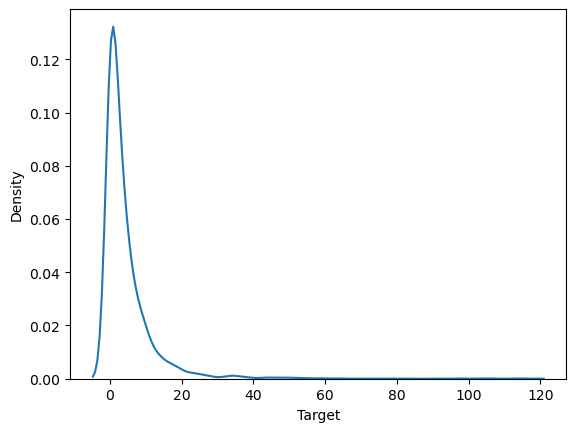

In [4]:
sns.kdeplot(train['Target'])

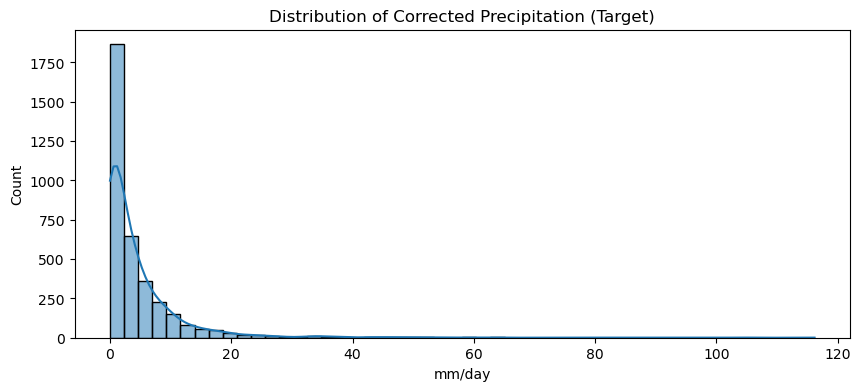

In [9]:
plt.figure(figsize=(10, 4))
sns.histplot(train['Target'], bins=50, kde=True)
plt.title("Distribution of Corrected Precipitation (Target)")
plt.xlabel("mm/day")
plt.show()

In [26]:
train['is_test'] = False
test['is_test'] = True
full_df = pd.concat([train, test], axis=0)

In [27]:
cat_cols = full_df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = full_df.select_dtypes(include=['number']).columns.tolist()

In [28]:
# for col in num_cols:
#     col_df = train[train[col] < 0]
#     print(col)
#     display(col_df)

# EDA

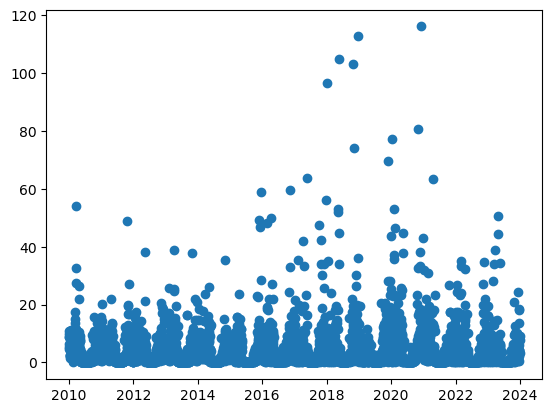

In [91]:
train['DATE'] = pd.to_datetime(train['DATE'])

plt.scatter(train['DATE'], train['Target'])

In [92]:
test

,ID,YEAR,MO,DY,WS2M,T2M,T2MWET,T2MDEW,RH2M,PS,QV2M,DATE,is_test
0,ID_OdrVnE_20110615,2011,6,15,1.50,24.58,22.92,21.27,82.72,96.19,16.51,2011-06-15,True
1,ID_MdWBtG_20230910,2023,9,10,1.80,25.27,22.97,20.66,76.89,96.25,15.89,2023-09-10,True
2,ID_YQ3N92_20180517,2018,5,17,0.98,24.98,23.32,21.67,82.71,96.10,16.94,2018-05-17,True
3,ID_73qWlF_20130902,2013,9,2,1.38,25.55,22.48,19.42,70.13,96.22,14.71,2013-09-02,True
4,ID_3u9JmK_20210212,2021,2,12,1.42,25.31,24.19,23.06,87.88,95.97,18.49,2021-02-12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,ID_VjdphP_20160605,2016,6,5,1.45,24.06,22.66,21.25,85.10,96.29,16.48,2016-06-05,True
1531,ID_5PkcqO_20200608,2020,6,8,1.15,24.47,23.16,21.85,85.98,96.21,17.11,2020-06-08,True
1532,ID_hGQUYi_20130111,2013,1,11,1.13,25.64,24.01,22.39,82.96,96.03,17.72,2013-01-11,True
1533,ID_6qf5LE_20220522,2022,5,22,1.36,24.60,23.54,22.48,88.53,96.24,17.78,2022-05-22,True


# Feature Engineering

In [74]:
full_df['week_of_year'] = pd.to_datetime(full_df['DATE']).dt.isocalendar().week
full_df

,ID,YEAR,MO,DY,WS2M,T2M,T2MDEW,T2MWET,Target,RH2M,PS,QV2M,DATE,is_test,week_of_year
0,ID_IODka8_20140721,2014,7,21,1.83,22.67,18.75,20.71,0.00,79.73,96.49,14.07,2014-07-21,False,30
1,ID_JeycV8_20110904,2011,9,4,2.92,25.99,18.95,22.47,0.01,66.80,96.11,14.30,2011-09-04,False,35
2,ID_gdbFWm_20180416,2018,4,16,1.06,25.29,22.11,23.70,3.85,83.56,96.30,17.37,2018-04-16,False,16
3,ID_lR86N5_20190506,2019,5,6,0.66,26.04,22.93,24.49,2.80,83.68,96.15,18.30,2019-05-06,False,19
4,ID_v4KHmp_20200908,2020,9,8,1.86,25.35,20.98,23.16,2.58,77.90,96.10,16.24,2020-09-08,False,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,ID_VjdphP_20160605,2016,6,5,1.45,24.06,21.25,22.66,NaN,85.10,96.29,16.48,2016-06-05,True,22
1531,ID_5PkcqO_20200608,2020,6,8,1.15,24.47,21.85,23.16,NaN,85.98,96.21,17.11,2020-06-08,True,24
1532,ID_hGQUYi_20130111,2013,1,11,1.13,25.64,22.39,24.01,NaN,82.96,96.03,17.72,2013-01-11,True,2
1533,ID_6qf5LE_20220522,2022,5,22,1.36,24.60,22.48,23.54,NaN,88.53,96.24,17.78,2022-05-22,True,20


# Training

In [77]:
copy_df = full_df[full_df['is_test'] == False].copy()
cols_to_drop = ['ID', 'Target', 'DATE', 'is_test']
X = copy_df.drop(columns=cols_to_drop)
y = copy_df['Target']

In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# import lightgbm as lgb

# # train_dataset = lgb.Dataset(X_train, y_train)
# # valid_dataset = lgb.Dataset(X_valid, y_valid)

# lgb_model = lgb.LGBMRegressor(
#     objective='regression',
# 	metric='rmse',
# 	n_estimators=5000,
# 	learning_rate=1e-2,
# 	# num_leaves=63,
# 	# max_depth=4,
# 	random_state=42,
# 	n_jobs=-1)

# lgb_model.fit(
#     X_train,
#     y_train,
# 	eval_set=[(X_valid, y_valid)],
# 	eval_metric='rmse',
# 	callbacks=[lgb.early_stopping(500, verbose=False), lgb.log_evaluation(100)])

# plt.figure(figsize=(10, 6))
# sns.barplot(
# 	x=lgb_model.feature_importances_,
# 	y=X_valid.columns,
# 	order=[col for _, col in sorted(zip(lgb_model.feature_importances_, X_valid.columns), reverse=True)]
# )
# plt.title("LightGBM Feature Importances")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.show()

In [80]:
from catboost import CatBoostRegressor, Pool
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)


In [94]:
cb_params = {
	'iterations': 10000,
	'learning_rate': 1e-2,
	'depth': 4,
	'loss_function': 'RMSE',
	'random_seed': 42,
	'verbose': 100,
	'early_stopping_rounds': 500,
}

cb_model = CatBoostRegressor(**cb_params)
cb_model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=500)

0:	learn: 8.0905361	test: 8.2480520	best: 8.2480520 (0)	total: 1.57ms	remaining: 15.7s
100:	learn: 7.2455308	test: 7.6199443	best: 7.6199443 (100)	total: 176ms	remaining: 17.3s
200:	learn: 6.9627622	test: 7.4852962	best: 7.4852962 (200)	total: 283ms	remaining: 13.8s
300:	learn: 6.7732934	test: 7.4304475	best: 7.4301816 (293)	total: 331ms	remaining: 10.7s
400:	learn: 6.6527357	test: 7.4096521	best: 7.4092764 (392)	total: 372ms	remaining: 8.91s
500:	learn: 6.5474855	test: 7.4034170	best: 7.4033800 (498)	total: 412ms	remaining: 7.81s
600:	learn: 6.4609082	test: 7.4012911	best: 7.4012911 (600)	total: 452ms	remaining: 7.06s
700:	learn: 6.3741783	test: 7.3912655	best: 7.3912655 (700)	total: 495ms	remaining: 6.56s
800:	learn: 6.2940345	test: 7.3882634	best: 7.3872965 (781)	total: 542ms	remaining: 6.22s
900:	learn: 6.2071657	test: 7.3871813	best: 7.3871813 (900)	total: 633ms	remaining: 6.4s
1000:	learn: 6.1267562	test: 7.3877764	best: 7.3842650 (943)	total: 685ms	remaining: 6.15s
1100:	learn: 

In [95]:
# Predict on validation set
valid_preds = cb_model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, valid_preds))
rmse


7.384264951946342

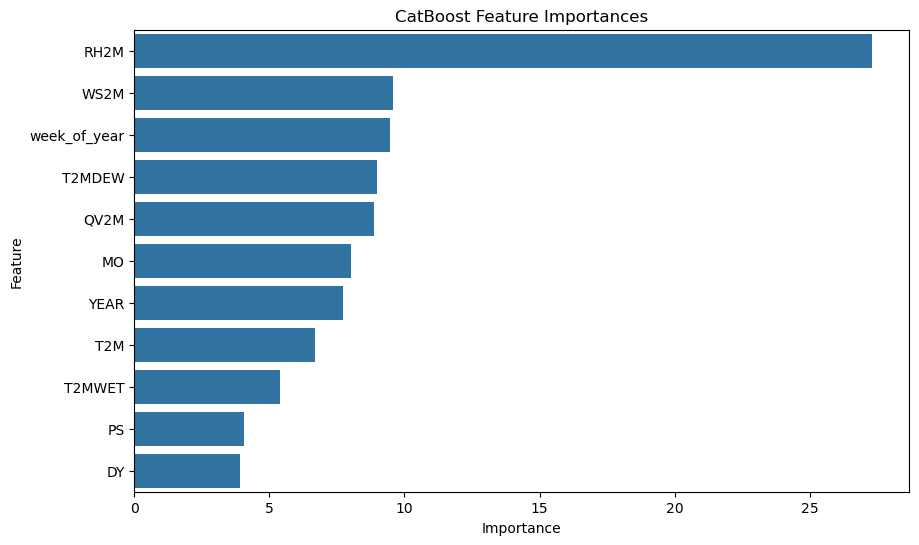

In [96]:
importances = cb_model.get_feature_importance()
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(
	x=importances[sorted_idx],
	y=np.array(X_valid.columns)[sorted_idx]
)
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Inference

In [98]:
copy_test_df = full_df[full_df['is_test'] == True].copy()
copy_test_df = copy_test_df.drop(columns=cols_to_drop)
test_preds = cb_model.predict(copy_test_df)
test_preds

array([ 1.74374041,  0.49433245,  3.55514643, ...,  5.36285163,
       10.09217819,  8.53423425])

In [99]:
# Create submission file
submission = test[['ID']].copy()
submission['Target'] = test_preds
submission

,ID,Target
0,ID_OdrVnE_20110615,1.743740
1,ID_MdWBtG_20230910,0.494332
2,ID_YQ3N92_20180517,3.555146
3,ID_73qWlF_20130902,1.233614
4,ID_3u9JmK_20210212,8.398795
...,...,...
1530,ID_VjdphP_20160605,2.524451
1531,ID_5PkcqO_20200608,5.761154
1532,ID_hGQUYi_20130111,5.362852
1533,ID_6qf5LE_20220522,10.092178


In [100]:
submission.to_csv('base_cb_sub.csv', index=False)